# TEST 3 - Baraffe full grid

This notebook is only for the colour maps

We use the helium mass fraction that Baraffe uses in her 1997 paper Y=0.25 for the whole grid.

In this test I include h2 and he3, use the tau100 tables and explore the following parameters:
- \[Fe/H\] = -0.5, 0, 0.3
- $\alpha_{MLT}$ = 1.0, 1.6, 1.82
- masses = (0.1, 0.6) in steps of 0.05

In [1]:
import mesa_reader as mr
import numpy as np 
import matplotlib.pyplot as plt

# Colour map for the masses

In [2]:
%matplotlib ipympl

In [3]:
# Define the parameters
masses = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]  # Genera masas de 0.1 a 0.6 en incrementos de 0.05
alphas = [1.0, 1.6, 1.82]
metallicities = [0.0045, 0.0142, 0.028]

# Base path
base_path = 'test_grid_composition_baraffe_full/results/mass{mass}_alpha{alpha}_z{z}/history.data'

# Create a list to store the MesaData instances
mesa_data_list = []

# Loop over the parameters to create the paths and MesaData instances
for mass in masses:
    for alpha in alphas:
        for z in metallicities:
            # Format the path
            path = base_path.format(mass=mass, alpha=alpha, z=z)
            
            try:
                # Create the MesaData instance
                mesa_data_instance = mr.MesaData(path)
                
                # Append the MesaData instance and its mass to the list
                mesa_data_list.append((mesa_data_instance, mass))
                
            except FileNotFoundError:
                print(f"FileNotFoundError: history.data not found for mass={mass}, alpha={alpha}, z={z}.")
                
# The try is to check which models were not computed in MESA

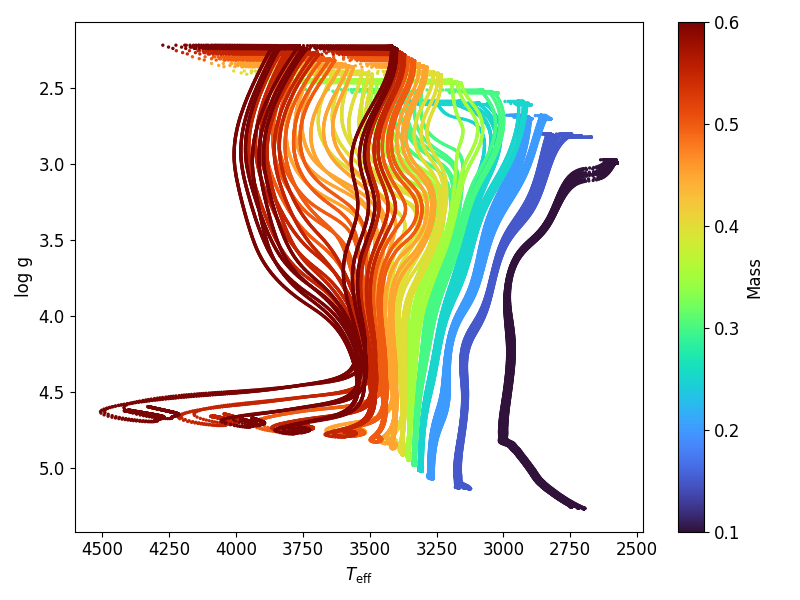

In [4]:
# Initialize lists to store Teff and log_g values
teff_values = []
log_g_values = []
mass_values = []

# Iterate over MesaData instances in mesa_data_list
for mesa_data, mass in mesa_data_list:
    # Access Teff and log_g attributes
    teff = mesa_data.Teff
    log_g = mesa_data.log_g
    
    # Append values to lists
    teff_values.append(teff)
    log_g_values.append(log_g)
    mass_values.append(mass * np.ones_like(teff))  # Create an array of the same length as teff

# Flatten the lists of values
teff_values_flat = np.concatenate(teff_values)
log_g_values_flat = np.concatenate(log_g_values)
mass_values_flat = np.concatenate(mass_values)

# Plot Teff vs log_g with colormap based on mass_values
plt.figure(figsize=(8, 6))

# Scatter plot 
sc = plt.scatter(teff_values_flat, log_g_values_flat, c=mass_values_flat, cmap='turbo', alpha=1, s=2)

# Create a colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Mass', fontsize=12) 

# Set the fontsize for colorbar ticks
cbar.ax.tick_params(labelsize=12)

plt.xlabel(r'$T_{\text{eff}}$', fontsize=12)
plt.ylabel('log g', fontsize=12)

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 

plt.gca().invert_xaxis()  # Invert x axis (log Teff)
plt.gca().invert_yaxis()  # Invert y axis (log g)

#plt.savefig('colour_map_masses.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Colour map for the metallicities

In [5]:
mesa_data_list = []

# Loop over the parameters to create the paths and MesaData instances
for mass in masses:
    for alpha in alphas:
        for z in metallicities:
            # Format the path
            path = base_path.format(mass=mass, alpha=alpha, z=z)
            
            try:
                # Create the MesaData instance
                mesa_data_instance = mr.MesaData(path)
                
                # Append the MesaData instance to the list
                mesa_data_list.append((mesa_data_instance, z))
                
            except FileNotFoundError:
                print(f"FileNotFoundError: history.data not found for mass={mass}, alpha={alpha}, z={z}.")

# Initialize lists to store Teff, log_g, and metallicity values
teff_values = []
log_g_values = []
metallicity_values = []

# Iterate over MesaData instances in mesa_data_list
for mesa_data, z in mesa_data_list:
    # Access Teff and log_g attributes
    teff = mesa_data.Teff
    log_g = mesa_data.log_g
    
    # Append values to lists
    teff_values.append(teff)
    log_g_values.append(log_g)
    metallicity_values.append(z * np.ones_like(teff))  # Create an array of the same length as teff

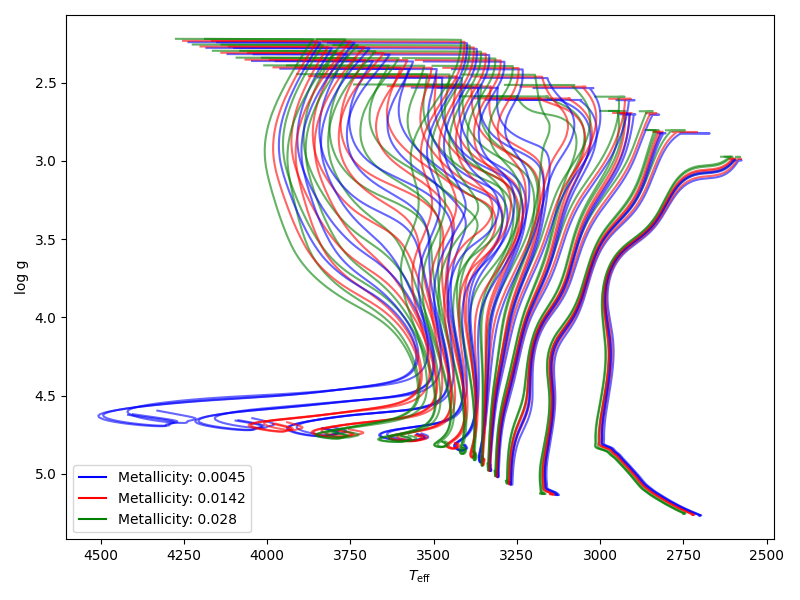

In [6]:
# Define colors for each metallicity
color_map = {0.0045: 'blue', 0.0142: 'red', 0.028: 'green'}

# Plot Teff vs log_g with different colors based on metallicity
plt.figure(figsize=(8, 6))

# Iterate over the lists and plot with the assigned colors
for teff, log_g, z in zip(teff_values, log_g_values, metallicity_values):
    plt.plot(teff, log_g, linestyle='-', color=color_map[z[0]], alpha=0.6, marker='')

# Add a legend for the metallicities
for z, color in color_map.items():
    plt.plot([], [], color=color, label=f'Metallicity: {z}')

plt.legend()

plt.xlabel(r'$T_{\text{eff}}$')
plt.ylabel('log g')

plt.gca().invert_xaxis()  # Invert x axis (log Teff)
plt.gca().invert_yaxis()  # Invert y axis (log g)

plt.tight_layout()
#plt.savefig('colour_map_metallicities.png')
plt.show()

# Colour map for the ML parameter

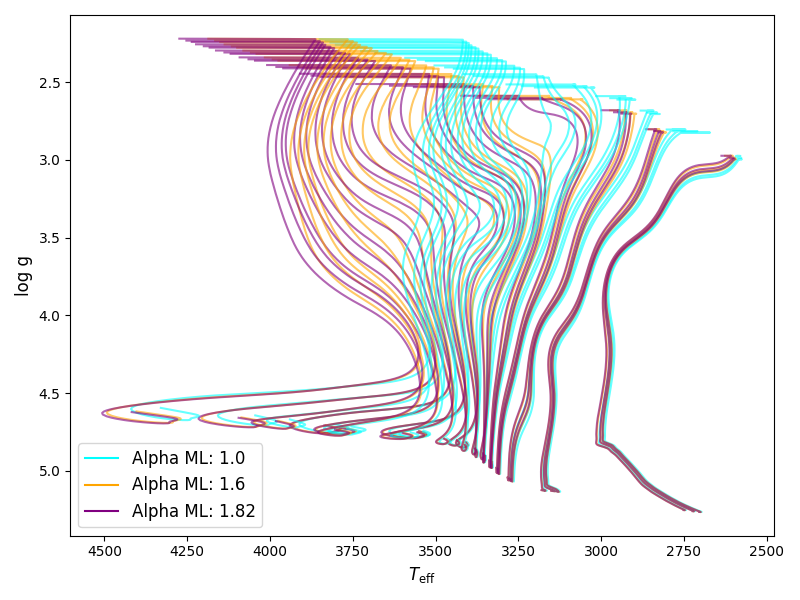

In [7]:
# Create a list to store the MesaData instances and their associated alpha values
mesa_data_list = []

# Loop over the parameters to create the paths and MesaData instances
for mass in masses:
    for alpha in alphas:
        for z in metallicities:
            # Format the path
            path = base_path.format(mass=mass, alpha=alpha, z=z)
            
            try:
                # Create the MesaData instance
                mesa_data_instance = mr.MesaData(path)
                
                # Append the MesaData instance to the list
                mesa_data_list.append((mesa_data_instance, alpha))
                
            except FileNotFoundError:
                print(f"FileNotFoundError: history.data not found for mass={mass}, alpha={alpha}, z={z}.")

# Initialize lists to store Teff, log_g, and alpha values
teff_values = []
log_g_values = []
alpha_values = []

# Iterate over MesaData instances in mesa_data_list
for mesa_data, alphaML in mesa_data_list:
    # Access Teff and log_g attributes
    teff = mesa_data.Teff
    log_g = mesa_data.log_g
    
    # Append values to lists
    teff_values.append(teff)
    log_g_values.append(log_g)
    alpha_values.append(alphaML * np.ones_like(teff))  # Create an array of the same length as teff

plt.figure(figsize=(8, 6))

# Define colors for each alpha ML
color_map = {1.0: 'cyan', 1.6: 'orange', 1.82:'purple'}

# Iterate over the lists and plot with the assigned colors
for teff, log_g, alpha in zip(teff_values, log_g_values, alpha_values):
    plt.plot(teff, log_g, linestyle='-', color=color_map[alpha[0]], alpha=0.6, marker='')

# Add a legend for the alpha values
for alpha, color in color_map.items():
    plt.plot([], [], color=color, label=f'Alpha ML: {alpha}')

plt.legend(fontsize=12)

plt.xlabel(r'$T_{\text{eff}}$', fontsize=12)
plt.ylabel('log g', fontsize=12)

plt.gca().invert_xaxis()  # Invert x axis (log Teff)
plt.gca().invert_yaxis()  # Invert y axis (log g)

plt.tight_layout()
#plt.savefig('colour_map_alphas.png')
plt.show()


# Abundances vs age of the models

In [8]:
# Create a list to store the MesaData instances and their associated alpha values
mesa_data_list = []

# Loop over the parameters to create the paths and MesaData instances
for mass in masses:
    for alpha in alphas:
        for z in metallicities:
            # Format the path
            path = base_path.format(mass=mass, alpha=alpha, z=z)
            
            try:
                # Create the MesaData instance
                mesa_data_instance = mr.MesaData(path)
                
                # Append the MesaData instance to the list
                mesa_data_list.append((mesa_data_instance, mass, z, alpha))
                
            except FileNotFoundError:
                print(f"FileNotFoundError: history.data not found for mass={mass}, alpha={alpha}, z={z}.")


## Metallicity effect

### 0.35$M_\odot$

In [9]:
# Iterate over mesa_data_list to find the specific model
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.82:   # fixed mass and alpha
        mass035_z0045_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        mass035_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.028 and mesa_data[3] == 1.82:
        mass035_z028_alpha182 = mesa_data[0]
        break

Firstly, we will plot for a fixed mass and fixed alpha the abundances for the 3 values of metallicity that we have and see
if there are any changes

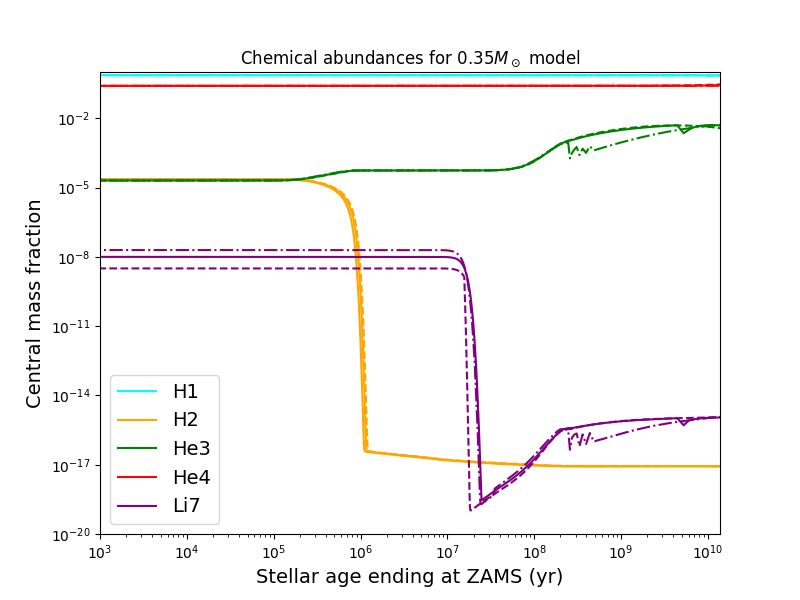

In [10]:
plt.figure(figsize=(8,6))

plt.xscale('log')
plt.yscale('log')

plt.plot(mass035_z0045_alpha182.star_age, mass035_z0045_alpha182.center_h1, color='cyan', marker='', linestyle='--')
plt.plot(mass035_z0142_alpha182.star_age, mass035_z0142_alpha182.center_h1, color='cyan', marker='', linestyle='-', label='H1')
plt.plot(mass035_z028_alpha182.star_age, mass035_z028_alpha182.center_h1, color='cyan', marker='', linestyle='-.')

plt.plot(mass035_z0045_alpha182.star_age, mass035_z0045_alpha182.center_h2, color='orange', marker='', linestyle='--')
plt.plot(mass035_z0142_alpha182.star_age, mass035_z0142_alpha182.center_h2, color='orange', marker='', linestyle='-', label='H2')
plt.plot(mass035_z028_alpha182.star_age, mass035_z028_alpha182.center_h2, color='orange', marker='', linestyle='-')

plt.plot(mass035_z0045_alpha182.star_age, mass035_z0045_alpha182.center_he3, color='green', marker='', linestyle='--')
plt.plot(mass035_z0142_alpha182.star_age, mass035_z0142_alpha182.center_he3, color='green', marker='', linestyle='-', label='He3')
plt.plot(mass035_z028_alpha182.star_age, mass035_z028_alpha182.center_he3, color='green', marker='', linestyle='-.')

plt.plot(mass035_z0045_alpha182.star_age, mass035_z0045_alpha182.center_he4, color='red', marker='', linestyle='--')
plt.plot(mass035_z0142_alpha182.star_age, mass035_z0142_alpha182.center_he4, color='red', marker='', linestyle='-', label='He4')
plt.plot(mass035_z028_alpha182.star_age, mass035_z028_alpha182.center_he4, color='red', marker='', linestyle='-.')

plt.plot(mass035_z0045_alpha182.star_age, mass035_z0045_alpha182.center_li7, color='purple', marker='', linestyle='--')
plt.plot(mass035_z0142_alpha182.star_age, mass035_z0142_alpha182.center_li7, color='purple', marker='', linestyle='-', label='Li7')
plt.plot(mass035_z028_alpha182.star_age, mass035_z028_alpha182.center_li7, color='purple', marker='', linestyle='-.')

# set axis labels
plt.xlabel(r'Stellar age ending at ZAMS (yr)', fontsize=14)  
plt.ylabel(r'Central mass fraction', fontsize=14)

plt.xlim((1e3,mass035_z0045_alpha182.star_age[-1]))
plt.ylim((1e-20,1))

plt.title(r'Chemical abundances for 0.35$M_\odot$ model')  
plt.legend(fontsize=14)

plt.show()

#plt.savefig('035_chemical_abundances_with_ppextras.png')

### 0.10$M_\odot$

In [11]:
# Iterate over mesa_data_list to find the specific model
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.82:   # fixed mass and alpha
        mass010_z0045_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        mass010_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.028 and mesa_data[3] == 1.82:
        mass010_z028_alpha182 = mesa_data[0]
        break

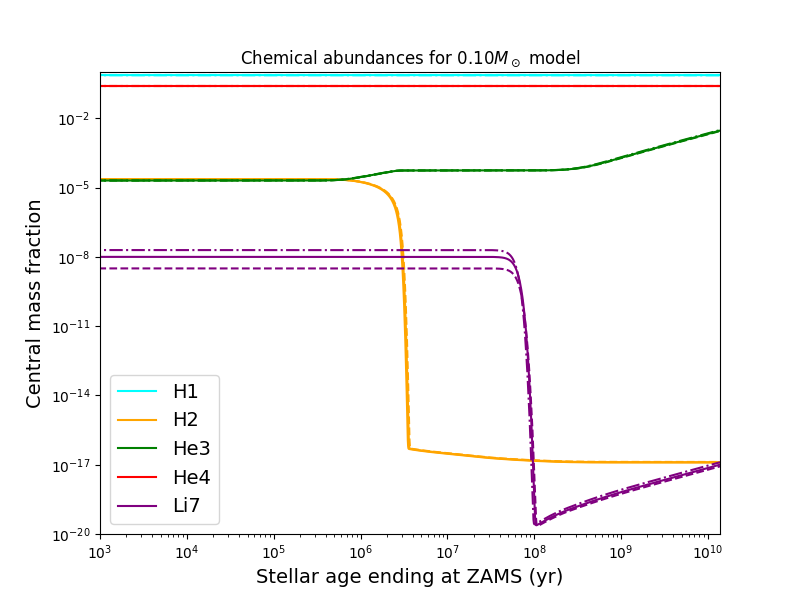

In [12]:
plt.figure(figsize=(8,6))

plt.xscale('log')
plt.yscale('log')

plt.plot(mass010_z0045_alpha182.star_age, mass010_z0045_alpha182.center_h1, color='cyan', marker='', linestyle='--')
plt.plot(mass010_z0142_alpha182.star_age, mass010_z0142_alpha182.center_h1, color='cyan', marker='', linestyle='-', label='H1')
plt.plot(mass010_z028_alpha182.star_age, mass010_z028_alpha182.center_h1, color='cyan', marker='', linestyle='-.')

plt.plot(mass010_z0045_alpha182.star_age, mass010_z0045_alpha182.center_h2, color='orange', marker='', linestyle='--')
plt.plot(mass010_z0142_alpha182.star_age, mass010_z0142_alpha182.center_h2, color='orange', marker='', linestyle='-', label='H2')
plt.plot(mass010_z028_alpha182.star_age, mass010_z028_alpha182.center_h2, color='orange', marker='', linestyle='-')

plt.plot(mass010_z0045_alpha182.star_age, mass010_z0045_alpha182.center_he3, color='green', marker='', linestyle='--')
plt.plot(mass010_z0142_alpha182.star_age, mass010_z0142_alpha182.center_he3, color='green', marker='', linestyle='-', label='He3')
plt.plot(mass010_z028_alpha182.star_age, mass010_z028_alpha182.center_he3, color='green', marker='', linestyle='-.')

plt.plot(mass010_z0045_alpha182.star_age, mass010_z0045_alpha182.center_he4, color='red', marker='', linestyle='--')
plt.plot(mass010_z0142_alpha182.star_age, mass010_z0142_alpha182.center_he4, color='red', marker='', linestyle='-', label='He4')
plt.plot(mass010_z028_alpha182.star_age, mass010_z028_alpha182.center_he4, color='red', marker='', linestyle='-.')

plt.plot(mass010_z0045_alpha182.star_age, mass010_z0045_alpha182.center_li7, color='purple', marker='', linestyle='--')
plt.plot(mass010_z0142_alpha182.star_age, mass010_z0142_alpha182.center_li7, color='purple', marker='', linestyle='-', label='Li7')
plt.plot(mass010_z028_alpha182.star_age, mass010_z028_alpha182.center_li7, color='purple', marker='', linestyle='-.')

# set axis labels
plt.xlabel(r'Stellar age ending at ZAMS (yr)', fontsize=14)  
plt.ylabel(r'Central mass fraction', fontsize=14)

plt.xlim((1e3,mass035_z0045_alpha182.star_age[-1]))
plt.ylim((1e-20,1))

plt.title(r'Chemical abundances for 0.10$M_\odot$ model')  
plt.legend(fontsize=14)

plt.show()

#plt.savefig('010_chemical_abundances_with_ppextras.png')

### 0.60$M_\odot$

In [13]:
# Iterate over mesa_data_list to find the specific model
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.82:   # fixed mass and alpha
        mass060_z0045_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        mass060_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.028 and mesa_data[3] == 1.82:
        mass060_z028_alpha182 = mesa_data[0]
        break

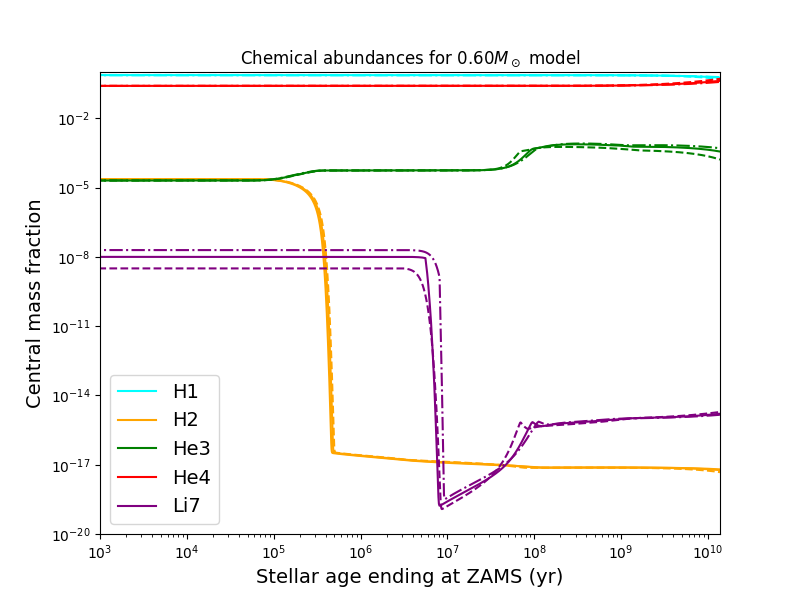

In [14]:
plt.figure(figsize=(8,6))

plt.xscale('log')
plt.yscale('log')

plt.plot(mass060_z0045_alpha182.star_age, mass060_z0045_alpha182.center_h1, color='cyan', marker='', linestyle='--')
plt.plot(mass060_z0142_alpha182.star_age, mass060_z0142_alpha182.center_h1, color='cyan', marker='', linestyle='-', label='H1')
plt.plot(mass060_z028_alpha182.star_age, mass060_z028_alpha182.center_h1, color='cyan', marker='', linestyle='-.')

plt.plot(mass060_z0045_alpha182.star_age, mass060_z0045_alpha182.center_h2, color='orange', marker='', linestyle='--')
plt.plot(mass060_z0142_alpha182.star_age, mass060_z0142_alpha182.center_h2, color='orange', marker='', linestyle='-', label='H2')
plt.plot(mass060_z028_alpha182.star_age, mass060_z028_alpha182.center_h2, color='orange', marker='', linestyle='-')

plt.plot(mass060_z0045_alpha182.star_age, mass060_z0045_alpha182.center_he3, color='green', marker='', linestyle='--')
plt.plot(mass060_z0142_alpha182.star_age, mass060_z0142_alpha182.center_he3, color='green', marker='', linestyle='-', label='He3')
plt.plot(mass060_z028_alpha182.star_age, mass060_z028_alpha182.center_he3, color='green', marker='', linestyle='-.')

plt.plot(mass060_z0045_alpha182.star_age, mass060_z0045_alpha182.center_he4, color='red', marker='', linestyle='--')
plt.plot(mass060_z0142_alpha182.star_age, mass060_z0142_alpha182.center_he4, color='red', marker='', linestyle='-', label='He4')
plt.plot(mass060_z028_alpha182.star_age, mass060_z028_alpha182.center_he4, color='red', marker='', linestyle='-.')

plt.plot(mass060_z0045_alpha182.star_age, mass060_z0045_alpha182.center_li7, color='purple', marker='', linestyle='--')
plt.plot(mass060_z0142_alpha182.star_age, mass060_z0142_alpha182.center_li7, color='purple', marker='', linestyle='-', label='Li7')
plt.plot(mass060_z028_alpha182.star_age, mass060_z028_alpha182.center_li7, color='purple', marker='', linestyle='-.')

# set axis labels
plt.xlabel(r'Stellar age ending at ZAMS (yr)', fontsize=14)  
plt.ylabel(r'Central mass fraction', fontsize=14)

plt.xlim((1e3,mass035_z0045_alpha182.star_age[-1]))
plt.ylim((1e-20,1))

plt.title(r'Chemical abundances for 0.60$M_\odot$ model')  
plt.legend(fontsize=14)

plt.show()

#plt.savefig('060_chemical_abundances_with_ppextras.png')